In [64]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0).
    epochs : int
        Passes over the training dataset.
    
    Attributes
    ----------
    w : 1d-array
        Weights after fitting.
    errors : list
        Number of misclassifications in every epoch.
        
    """
    
    def __init__(self, eta = 0.01, epochs = 10):
        self.eta = eta
        self.epochs = epochs
    
    def fit(self, X, y):
        """Fit training data.
    
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        
        Returns
        -------
        self : object

        """
        self.w = np.zeros(1 + X.shape[1])
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0

            for xi, actual in zip(X, y):
                predicted = self.predict(xi)
                update = self.eta * (actual - predicted)
                self.w[1:] += update * xi
                self.w[0] += update
                errors += int(update != 0.0)

            self.errors.append(errors)
        
        return self
    
    def net_input(self, X):
        """Calculate net input."""
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def predict(self, X):
        """Return class label after unit step."""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [65]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [66]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [67]:
%matplotlib inline

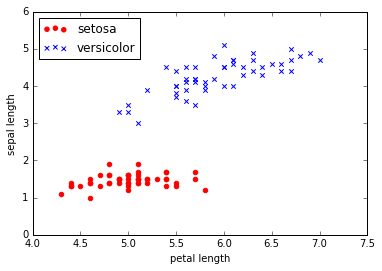

In [68]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:, 0], X[50:, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc = 'upper left')
plt.show()

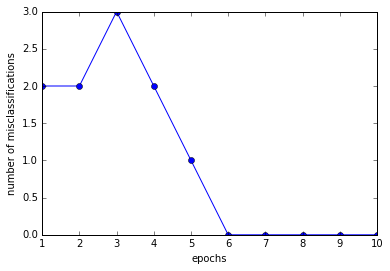

In [69]:
eta = 0.1
epochs = 10
ppn = Perceptron(eta = 0.1, epochs = 10)
ppn.fit(X, y)

plt.plot(range(1, epochs + 1), ppn.errors, marker = 'o')
plt.xlabel('epochs')
plt.ylabel('number of misclassifications')
plt.show()

In [70]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.2):
    uy = np.unique(y)
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(uy)])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(uy):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = cmap(idx),
                    marker = markers[idx], label = cl)

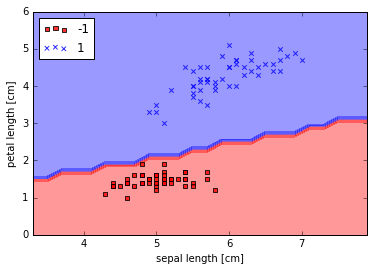

In [71]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()